<a href="https://colab.research.google.com/github/abdulmoizniazi/Azure-OpenAI/blob/main/Islamabad_Weather_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv(next(iter(uploaded)))

In [ ]:
df = pd.read_csv('pkweather.csv')
df.head()

,date,year,month,day,dayofweek,is_weekend,season,city,region,latitude,...,humidity,pressure,dew_point,cloud_cover,visibility,temp_range,is_hot_day,is_cold_day,rainfall_intensity,wind_category
0,1/1/2000,2000,1,1,5,1,Winter,Islamabad,Punjab,33.6844,...,76,1018.9,4.8,0,NaN,14.1,0,0,none,windy
1,1/2/2000,2000,1,2,6,1,Winter,Islamabad,Punjab,33.6844,...,77,1018.6,4.8,0,NaN,14.5,0,0,none,windy
2,1/3/2000,2000,1,3,0,0,Winter,Islamabad,Punjab,33.6844,...,76,1016.8,5.0,0,NaN,14.6,0,0,none,windy
3,1/4/2000,2000,1,4,1,0,Winter,Islamabad,Punjab,33.6844,...,75,1016.2,4.8,0,NaN,14.2,0,0,none,windy
4,1/5/2000,2000,1,5,2,0,Winter,Islamabad,Punjab,33.6844,...,77,1017.5,5.3,0,NaN,14.3,0,0,none,windy


In [ ]:
df.tail()

,date,year,month,day,dayofweek,is_weekend,season,city,region,latitude,...,humidity,pressure,dew_point,cloud_cover,visibility,temp_range,is_hot_day,is_cold_day,rainfall_intensity,wind_category
31774,12/27/2011,2011,12,27,1,0,Winter,Gilgit,Gilgit-Baltistan,35.9221,...,59,1031.0,-12.3,91,NaN,7.0,0,1,light,breezy
31775,12/28/2011,2011,12,28,2,0,Winter,Gilgit,Gilgit-Baltistan,35.9221,...,74,1027.5,-5.7,80,NaN,5.7,0,1,heavy,breezy
31776,12/29/2011,2011,12,29,3,0,Winter,Gilgit,Gilgit-Baltistan,35.9221,...,69,1031.3,-9.4,35,NaN,10.4,0,1,light,breezy
31777,12/30/2011,2011,12,30,4,0,Winter,Gilgit,Gilgit-Baltistan,35.9221,...,66,1039.2,-16.3,32,NaN,7.6,0,1,none,breezy
31778,12/31/2011,2011,12,31,5,1,Winter,Gilgit,Gilgit-Baltistan,35.9221,...,49,1031.1,-18.7,21,NaN,7.7,0,1,none,breezy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31779 entries, 0 to 31778
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                31779 non-null  object 
 1   year                31779 non-null  int64  
 2   month               31779 non-null  int64  
 3   day                 31779 non-null  int64  
 4   dayofweek           31779 non-null  int64  
 5   is_weekend          31779 non-null  int64  
 6   season              31779 non-null  object 
 7   city                31779 non-null  object 
 8   region              31779 non-null  object 
 9   latitude            31779 non-null  float64
 10  longitude           31779 non-null  float64
 11  elevation           31779 non-null  int64  
 12  tmin                31779 non-null  float64
 13  tmax                31779 non-null  float64
 14  tavg                31779 non-null  float64
 15  prcp                31779 non-null  float64
 16  wspd

In [ ]:
df.shape

(31779, 27)

In [ ]:
df.describe()

,year,month,day,dayofweek,is_weekend,latitude,longitude,elevation,tmin,tmax,...,prcp,wspd,humidity,pressure,dew_point,cloud_cover,visibility,temp_range,is_hot_day,is_cold_day
count,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,...,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,0.0,31779.000000,31779.000000,31779.000000
mean,2011.103370,6.522609,15.730577,3.000063,0.285818,31.759637,71.239903,651.656817,15.186488,25.787577,...,1.717801,12.902307,58.138614,1010.829195,10.129120,32.852104,NaN,10.601089,0.009755,0.067340
std,7.176794,3.448845,8.800627,2.000267,0.451810,3.653211,2.976196,590.625245,9.613917,9.814480,...,5.971060,7.857757,18.456379,8.481143,10.263861,30.246910,NaN,3.787311,0.098285,0.250614
min,2000.000000,1.000000,1.000000,0.000000,0.000000,24.860700,66.975000,8.000000,-21.300000,-12.900000,...,0.000000,0.800000,6.000000,989.700000,-28.700000,0.000000,NaN,0.700000,0.000000,0.000000
25%,2005.000000,4.000000,8.000000,1.000000,0.000000,30.179800,67.001100,217.000000,8.100000,19.700000,...,0.000000,7.900000,45.000000,1004.000000,3.700000,5.000000,NaN,7.800000,0.000000,0.000000
50%,2010.000000,7.000000,16.000000,3.000000,0.000000,33.684400,73.047900,540.000000,16.700000,28.500000,...,0.000000,11.300000,61.000000,1011.400000,10.300000,25.000000,NaN,10.500000,0.000000,0.000000
75%,2017.000000,10.000000,23.000000,5.000000,1.000000,34.015100,73.047900,1500.000000,23.500000,32.800000,...,0.500000,16.800000,73.000000,1016.800000,18.800000,55.000000,NaN,13.400000,0.000000,0.000000
max,2024.000000,12.000000,31.000000,6.000000,1.000000,35.922100,74.343600,1680.000000,32.600000,47.300000,...,201.100000,50.600000,96.000000,1042.900000,27.500000,100.000000,NaN,22.500000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
date,0
year,0
month,0
day,0
dayofweek,0
is_weekend,0
season,0
city,0
region,0
latitude,0


In [ ]:
# df = df.drop(index=0)
df = df.drop(columns='visibility')

df.head()

,date,year,month,day,dayofweek,is_weekend,season,city,region,latitude,...,wspd,humidity,pressure,dew_point,cloud_cover,temp_range,is_hot_day,is_cold_day,rainfall_intensity,wind_category
0,1/1/2000,2000,1,1,5,1,Winter,Islamabad,Punjab,33.6844,...,6.0,76,1018.9,4.8,0,14.1,0,0,none,windy
1,1/2/2000,2000,1,2,6,1,Winter,Islamabad,Punjab,33.6844,...,6.1,77,1018.6,4.8,0,14.5,0,0,none,windy
2,1/3/2000,2000,1,3,0,0,Winter,Islamabad,Punjab,33.6844,...,6.2,76,1016.8,5.0,0,14.6,0,0,none,windy
3,1/4/2000,2000,1,4,1,0,Winter,Islamabad,Punjab,33.6844,...,5.9,75,1016.2,4.8,0,14.2,0,0,none,windy
4,1/5/2000,2000,1,5,2,0,Winter,Islamabad,Punjab,33.6844,...,8.0,77,1017.5,5.3,0,14.3,0,0,none,windy


In [ ]:
monthly_avg = df.groupby('month')['tavg'].mean().reset_index()

norm = plt.Normalize(monthly_avg['tavg'].min(), monthly_avg['tavg'].max())
colors = plt.cm.coolwarm(norm(monthly_avg['tavg']))

/tmp/ipython-input-25-1595825315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='tavg', data=monthly_avg, palette=colors)
/tmp/ipython-input-25-1595825315.py:2: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='month', y='tavg', data=monthly_avg, palette=colors)


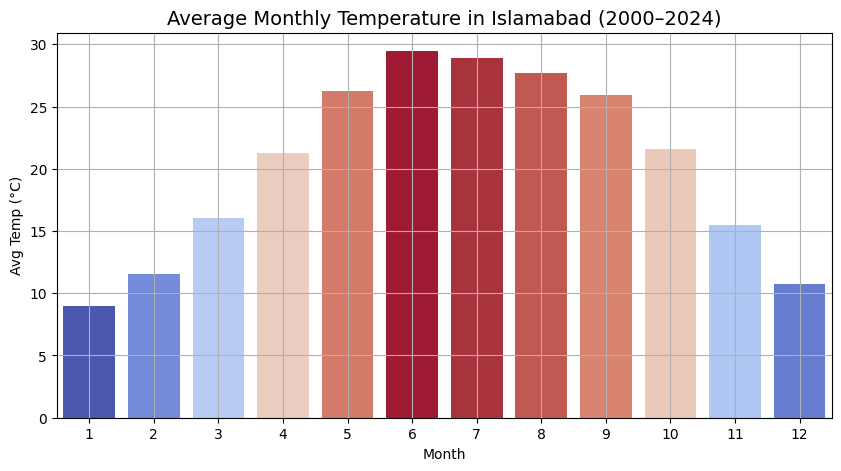

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='tavg', data=monthly_avg, palette=colors)
plt.title('Average Monthly Temperature in Islamabad (2000–2024)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Avg Temp (°C)')
plt.grid(True)
plt.show()

In [ ]:
annual_avg = df.groupby('year')['tavg'].mean().reset_index()
hottest_year = annual_avg.loc[annual_avg['tavg'].idxmax(), 'year']
coldest_year = annual_avg.loc[annual_avg['tavg'].idxmin(), 'year']
print(f"Hottest Year: {hottest_year}")
print(f"Coldest Year: {coldest_year}")

Hottest Year: 2012
Coldest Year: 2005


In [ ]:
df_hot = df[df['year'] == hottest_year]
df_cold = df[df['year'] == coldest_year]

hot_monthly = df_hot.groupby('month')['tavg'].mean().reset_index(name='Hottest Year')
cold_monthly = df_cold.groupby('month')['tavg'].mean().reset_index(name='Coldest Year')

comparison = pd.merge(hot_monthly, cold_monthly, on='month')

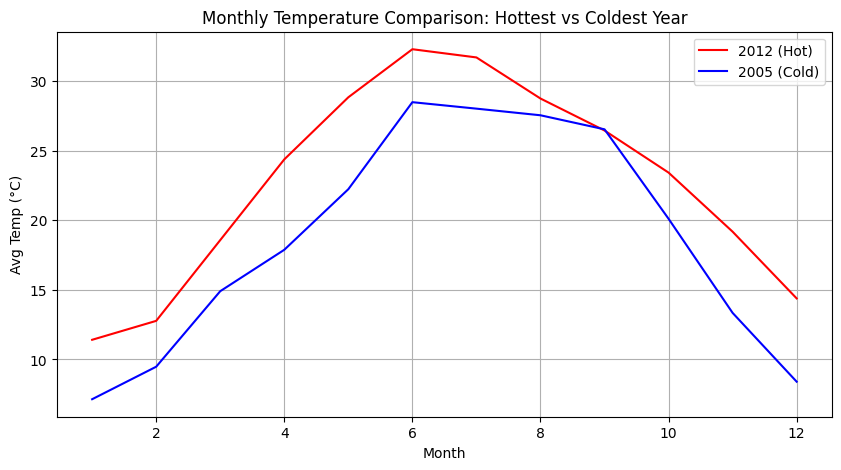

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(comparison['month'], comparison['Hottest Year'], label=f'{int(hottest_year)} (Hot)', color='red')
plt.plot(comparison['month'], comparison['Coldest Year'], label=f'{int(coldest_year)} (Cold)', color='blue')
plt.title('Monthly Temperature Comparison: Hottest vs Coldest Year')
plt.xlabel('Month')
plt.ylabel('Avg Temp (°C)')
plt.legend()
plt.grid(True)
plt.show()